# Data Madness
## Climate-Related Hazards

Jupyter Notebook used to clean and process Climate-Related Hazards.

**Group:** 27 

**Collaborators:** Bianca Caissotti di Chiusano, Chiara Paglioni, Sophia Widmer

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning and Processing

The following climated-related hazards are analysed in this project. The data was retrieve from 

In [2]:
wildfire_data = pd.read_csv('wildfires.csv')
floods_data = pd.read_csv('coastal_floods.csv')
drought_data = pd.read_csv('drought.csv')
wind_data = pd.read_csv('wind_threats.csv')

In [3]:
columns_todrop = ['DATAFLOW', 'FREQ: Frequency of observation', 'MEASURE: Measure', 'UNIT_MEASURE: Unit of measure', 'OBS_STATUS: Observation status', 'DECIMALS: Decimals', 'UNIT_MULT: Unit multiplier', 'HURRICANE_WIND_SCALE: Hurricane wind scale thresholds', 'RET_PERIOD: Return periods', 'HEAT_STRESS: Heat stress thresholds', 'DURATION: Duration']

In [4]:
countries = ['Netherlands', 'United States', 'Belgium', 'Russia', 'Slovak Republic', 'Costa Rica', 'Spain', 'Austria',
             'Sweden', 'Mexico', 'Luxembourg', 'Japan', 'Slovenia', 'Lithuania', 'Greece', 'United Kingdom', 'France',
             'Ireland', 'Australia', 'Switzerland', 'Colombia', 'Norway', 'Canada', 'Denmark', 'Germany', 'Portugal',
             'Latvia', 'Hungary', 'Türkiye', 'Korea', 'Finland', 'Israel', 'OECD - Europe', 'Estonia', 'Iceland',
             'Chile', 'Poland', 'New Zealand', 'Czech Republic', 'Italy', 'OECD - Total']

In [5]:
countries_correct = ['NLD: Netherlands', 'USA: United States', 'BEL: Belgium', 
             'RUS: Russia', 'SVK: Slovak Republic', 'CRI: Costa Rica', 
             'ESP: Spain', 'AUT: Austria', 'SWE: Sweden', 'MEX: Mexico', 
             'LUX: Luxembourg', 'JPN: Japan', 'SVN: Slovenia', 'LTU: Lithuania', 
             'GRC: Greece', 'GBR: United Kingdom', 'FRA: France', 'IRL: Ireland',
             'AUS: Australia', 'CHE: Switzerland', 'COL: Colombia', 'NOR: Norway',
             'CAN: Canada','DNK: Denmark', 'DEU: Germany', 'PRT: Portugal', 
             'LVA: Latvia', 'HUN: Hungary', 'TUR: Türkiye', 'KOR: Korea',
             'FIN: Finland', 'ISR: Israel','OECDE: OECD Europe', 'EST: Estonia',
             'ISL: Iceland', 'CHL: Chile', 'POL: Poland', 'NZL: New Zealand', 
             'CZE: Czech Republic', 'ITA: Italy', 'OECD: OECD']

In [6]:
zipped_countries = dict(zip(countries_correct, countries))

### Wildfire Data

- **Frequency of observation:** annual
- **Frequency of measure:** amount of burned area
- **Unit of measure:** square kilometers
- **Time period:** from 2001 to 2021
- **Countries:** 258

In [7]:
wildfire_data_clean = wildfire_data.drop(columns_todrop, axis=1)
wildfire_data_clean = wildfire_data_clean.loc[wildfire_data_clean['TIME_PERIOD: Time period'].between(2001, 2020)]
wildfire_data_clean = wildfire_data_clean[wildfire_data_clean['REF_AREA: Reference area'].isin(countries_correct)]
wildfire_data_clean['REF_AREA: Reference area'] = wildfire_data_clean['REF_AREA: Reference area'].map(zipped_countries)
wildfire_data_clean = wildfire_data_clean.sort_values(['REF_AREA: Reference area', 'TIME_PERIOD: Time period'])
wildfire_data_clean['CLIMATE_HAZARDS'] = 'wildfire'

# Save clean data
wildfire_data_clean.to_csv('wildfire_clean.csv', index=False)
wildfire_data_clean

,REF_AREA: Reference area,TIME_PERIOD: Time period,OBS_VALUE,CLIMATE_HAZARDS
1365,Australia,2001,900401.42770,wildfire
1366,Australia,2002,761169.01550,wildfire
1367,Australia,2003,374209.81410,wildfire
1368,Australia,2004,607280.01860,wildfire
1369,Australia,2005,302423.13140,wildfire
...,...,...,...,...
4824,United States,2016,32122.37897,wildfire
4825,United States,2017,40377.21277,wildfire
4826,United States,2018,40915.34038,wildfire
4827,United States,2019,27979.22292,wildfire


### Floods Data

- **Frequency of observation:** annual
- **Measure:** land exposure to coastal flooding
- **Unit of measure:** percentage of land area
- **Return period:** 25 years
- **Time period:** from 2000 to 2020
- **Countries:** 196

In [8]:
floods_data_clean = floods_data.drop(columns_todrop, axis=1)
floods_data_clean = floods_data_clean.loc[floods_data_clean['TIME_PERIOD: Time period'].between(2001, 2020)]
floods_data_clean = floods_data_clean[floods_data_clean['REF_AREA: Reference area'].isin(countries_correct)]
floods_data_clean['REF_AREA: Reference area'] = floods_data_clean['REF_AREA: Reference area'].map(zipped_countries)
floods_data_clean = floods_data_clean.sort_values(['REF_AREA: Reference area', 'TIME_PERIOD: Time period'])
floods_data_clean['CLIMATE_HAZARDS'] = 'flood'

# Save clean data
floods_data_clean.to_csv('floods_clean.csv', index=False)
floods_data_clean

,REF_AREA: Reference area,TIME_PERIOD: Time period,OBS_VALUE,CLIMATE_HAZARDS
505,Australia,2001,0.238529,flood
904,Australia,2001,0.224590,flood
14680,Australia,2001,0.209002,flood
14785,Australia,2001,0.253463,flood
506,Australia,2002,0.238529,flood
...,...,...,...,...
15706,United States,2019,0.502794,flood
4556,United States,2020,0.427018,flood
9050,United States,2020,0.511850,flood
12095,United States,2020,0.472056,flood


### Droughts Data

- **Frequency of observation:** annual
- **Measure:** Land soil moisture anomaly
- **Unit of measure:** Percentage change
- **Time period:** from 1981 to 2021
- **Countries:** 232

In [9]:
drought_data_clean = drought_data.drop(columns_todrop, axis=1)
drought_data_clean = drought_data_clean.loc[drought_data_clean['TIME_PERIOD: Time period'].between(2001, 2020)]
drought_data_clean = drought_data_clean[drought_data_clean['REF_AREA: Reference area'].isin(countries_correct)]
drought_data_clean['REF_AREA: Reference area'] = drought_data_clean['REF_AREA: Reference area'].map(zipped_countries)
drought_data_clean = drought_data_clean.sort_values(['REF_AREA: Reference area', 'TIME_PERIOD: Time period'])
drought_data_clean['CLIMATE_HAZARDS'] = 'drought'

# Save clean data
drought_data_clean.to_csv('drought_clean.csv', index=False)
drought_data_clean

,REF_AREA: Reference area,TIME_PERIOD: Time period,OBS_VALUE,CLIMATE_HAZARDS
6006,Australia,2001,-3.507413,drought
17035,Australia,2001,1.951618,drought
6007,Australia,2002,-14.384053,drought
17036,Australia,2002,-16.176138,drought
6008,Australia,2003,-1.009243,drought
...,...,...,...,...
14510,United States,2018,0.313792,drought
4056,United States,2019,4.387282,drought
14511,United States,2019,2.059921,drought
4057,United States,2020,-3.665213,drought


### Wind data

- **Frequency of observation:** annual
- **Measure:** land exposure to wind threats
- **Unit of measure:** percentage of land area
- **Return period:** 25 years
- **Time period:** from 2000 to 2020
- **Countries:** 258

In [10]:
wind_data_clean = wind_data.drop(columns_todrop, axis=1)
wind_data_clean = wind_data_clean.loc[wind_data_clean['TIME_PERIOD: Time period'].between(2001, 2020)]
wind_data_clean = wind_data_clean[wind_data_clean['REF_AREA: Reference area'].isin(countries_correct)]
wind_data_clean['REF_AREA: Reference area'] = wind_data_clean['REF_AREA: Reference area'].map(zipped_countries)
wind_data_clean = wind_data_clean.sort_values(['REF_AREA: Reference area', 'TIME_PERIOD: Time period'])
wind_data_clean['CLIMATE_HAZARDS'] = 'wind'

# Save clean data
wind_data_clean.to_csv('wind_clean.csv', index=False)
wind_data_clean

,REF_AREA: Reference area,TIME_PERIOD: Time period,OBS_VALUE,CLIMATE_HAZARDS
6996,Australia,2001,7.125348,wind
9819,Australia,2001,0.000000,wind
25763,Australia,2001,0.000000,wind
27426,Australia,2001,5.847663,wind
32741,Australia,2001,0.000000,wind
...,...,...,...,...
56810,United States,2020,0.809930,wind
73238,United States,2020,2.564791,wind
73471,United States,2020,0.429408,wind
74568,United States,2020,0.000000,wind


### Merge Climate-Related Hazards DataFrames

In [11]:
final_df = pd.concat([wildfire_data_clean, wind_data_clean, floods_data_clean, drought_data_clean], ignore_index=True)

final_df = final_df.sort_values(['REF_AREA: Reference area', 'TIME_PERIOD: Time period'])
final_df = final_df.reset_index(drop=True)
final_df['TIME_PERIOD: Time period'] = final_df['TIME_PERIOD: Time period'].astype("string")

# Save clean data
final_df.to_csv('hazards_data_clean.csv', index=False)
final_df

,REF_AREA: Reference area,TIME_PERIOD: Time period,OBS_VALUE,CLIMATE_HAZARDS
0,Australia,2001,900401.427700,wildfire
1,Australia,2001,7.125348,wind
2,Australia,2001,0.000000,wind
3,Australia,2001,0.000000,wind
4,Australia,2001,5.847663,wind
...,...,...,...,...
18355,United States,2020,0.511850,flood
18356,United States,2020,0.472056,flood
18357,United States,2020,0.502794,flood
18358,United States,2020,-3.665213,drought


## Descriptive Statistics

In [12]:
# Check NaN
final_df.isna().sum()

REF_AREA: Reference area    0
TIME_PERIOD: Time period    0
OBS_VALUE                   0
CLIMATE_HAZARDS             0
dtype: int64

### Wildfire Data

In [13]:
wildfire_data_clean['OBS_VALUE'].describe()

count       820.000000
mean      32073.669295
std      125966.193826
min           0.000000
25%           2.989702
50%          46.739431
75%        1238.693705
max      981736.721800
Name: OBS_VALUE, dtype: float64

In [14]:
wildfire_data_clean.loc[wildfire_data_clean['OBS_VALUE'].idxmax()]

REF_AREA: Reference area    OECD - Total
TIME_PERIOD: Time period            2012
OBS_VALUE                    981736.7218
CLIMATE_HAZARDS                 wildfire
Name: 515, dtype: object

In [15]:
wildfire_data_clean.loc[wildfire_data_clean['OBS_VALUE'].idxmin()]

REF_AREA: Reference area     Austria
TIME_PERIOD: Time period        2010
OBS_VALUE                        0.0
CLIMATE_HAZARDS             wildfire
Name: 555, dtype: object

### Floods Data

In [16]:
floods_data_clean['OBS_VALUE'].describe()

count    2800.000000
mean        2.418612
std         8.733940
min         0.000223
25%         0.130069
50%         0.511225
75%         0.772273
max        53.239493
Name: OBS_VALUE, dtype: float64

In [17]:
floods_data_clean.loc[floods_data_clean['OBS_VALUE'].idxmax()]

REF_AREA: Reference area    Netherlands
TIME_PERIOD: Time period           2001
OBS_VALUE                     53.239493
CLIMATE_HAZARDS                   flood
Name: 11047, dtype: object

In [18]:
floods_data_clean.loc[floods_data_clean['OBS_VALUE'].idxmin()]

REF_AREA: Reference area      Israel
TIME_PERIOD: Time period        2001
OBS_VALUE                   0.000223
CLIMATE_HAZARDS                flood
Name: 7834, dtype: object

### Droughts Data

In [19]:
drought_data_clean['OBS_VALUE'].describe()

count    1620.000000
mean       -0.806891
std         3.804405
min       -20.839749
25%        -2.703385
50%        -0.405758
75%         1.476429
max        14.730090
Name: OBS_VALUE, dtype: float64

In [20]:
drought_data_clean.loc[drought_data_clean['OBS_VALUE'].idxmax()]

REF_AREA: Reference area     Hungary
TIME_PERIOD: Time period        2010
OBS_VALUE                   14.73009
CLIMATE_HAZARDS              drought
Name: 9049, dtype: object

In [21]:
drought_data_clean.loc[drought_data_clean['OBS_VALUE'].idxmin()]

REF_AREA: Reference area    Australia
TIME_PERIOD: Time period         2019
OBS_VALUE                  -20.839749
CLIMATE_HAZARDS               drought
Name: 17053, dtype: object

### Wind Data

In [22]:
wind_data_clean['OBS_VALUE'].describe()

count    13120.000000
mean         3.725367
std         15.292341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: OBS_VALUE, dtype: float64

In [23]:
wind_data_clean.loc[wind_data_clean['OBS_VALUE'].idxmax()]

REF_AREA: Reference area    Denmark
TIME_PERIOD: Time period       2005
OBS_VALUE                     100.0
CLIMATE_HAZARDS                wind
Name: 23049, dtype: object

In [24]:
wind_data_clean.loc[wind_data_clean['OBS_VALUE'].idxmin()]

REF_AREA: Reference area    Australia
TIME_PERIOD: Time period         2001
OBS_VALUE                         0.0
CLIMATE_HAZARDS                  wind
Name: 9819, dtype: object

## EDA

### Outliers

The Climate-Related Hazards are plotted in separate boxplots to detect outliers. All Climate-Related Hazards except for the Droughts have a large number of outliers however, due to the limited amount of data the outliers were not removed from the DataFrame. Moreover, the outliers could be justified by the rapid increase of climate-related hazards throughout the years.

Text(0.5, 1.0, 'Boxplot of Wind Data')

<Figure size 1296x648 with 0 Axes>

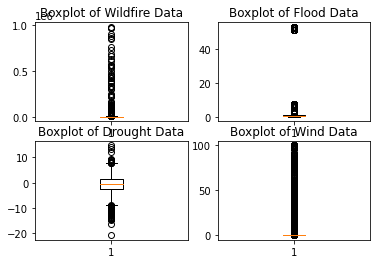

In [25]:
plt.figure(figsize=(18, 9))
fig, axs = plt.subplots(2, 2)

axs[0, 0].boxplot(wildfire_data_clean['OBS_VALUE'])
axs[0, 0].set_title('Boxplot of Wildfire Data')

axs[0, 1].boxplot(floods_data_clean['OBS_VALUE'])
axs[0, 1].set_title('Boxplot of Flood Data')

axs[1, 0].boxplot(drought_data_clean['OBS_VALUE'])
axs[1, 0].set_title('Boxplot of Drought Data')

axs[1, 1].boxplot(wind_data_clean['OBS_VALUE'])
axs[1, 1].set_title('Boxplot of Wind Data')

Text(0, 0.5, 'Amount of Observations')

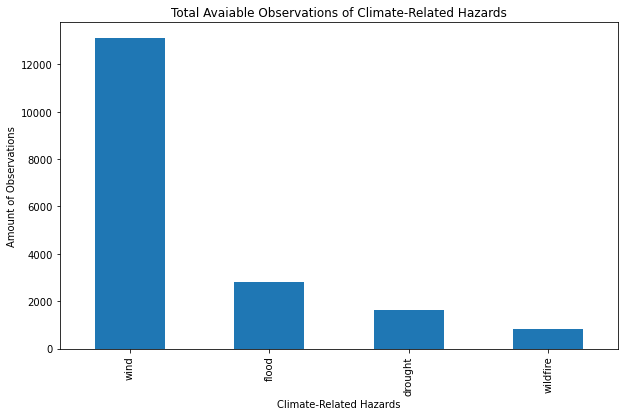

In [26]:
plt.figure(figsize=(10, 6))

final_df['CLIMATE_HAZARDS'].value_counts().plot(kind='bar')
plt.title('Total Avaiable Observations of Climate-Related Hazards')
plt.xlabel('Climate-Related Hazards')
plt.ylabel('Amount of Observations')

In [27]:
final_df['REF_AREA: Reference area'].value_counts()

Sweden             460
Japan              460
Poland             460
Chile              460
Russia             460
Germany            460
Norway             460
OECD - Europe      460
Slovenia           460
Korea              460
Mexico             460
Estonia            460
Canada             460
Ireland            460
Israel             460
Lithuania          460
Denmark            460
Türkiye            460
Finland            460
Netherlands        460
Spain              460
Greece             460
New Zealand        460
Portugal           460
Belgium            460
Latvia             460
Italy              460
United States      460
OECD - Total       460
Australia          460
United Kingdom     460
Colombia           460
Costa Rica         460
France             460
Iceland            440
Switzerland        380
Austria            380
Luxembourg         380
Czech Republic     380
Hungary            380
Slovak Republic    380
Name: REF_AREA: Reference area, dtype: int64

### Plot of Climate-Related Hazards by Country

In [28]:
def plot_country_sns(country_name):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.lineplot(x='TIME_PERIOD: Time period', y='OBS_VALUE', hue='CLIMATE_HAZARDS', data=final_df.loc[final_df['REF_AREA: Reference area'] == country_name])
    
    plt.title(country_name + ' Climate-Related Hazards Line Plots')
    plt.xlabel('Year')
    plt.ylabel('Observed Value')
    plt.legend(loc='upper left')
    plt.savefig(country_name + '-Plot.png')

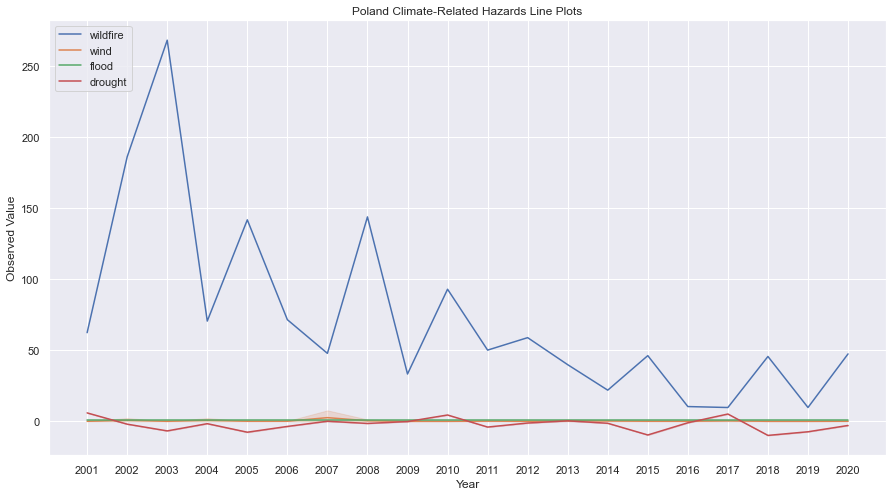

In [29]:
plot_country_sns('Poland')

### Plot of Climate Related Hazards by Year 

In [30]:
pd.options.mode.chained_assignment = None

def plot_hazard(countries, hazard_type):
    hazard_data = pd.DataFrame()
    
    if hazard_type == 'Wildfires': 
        hazard_data = wildfire_data_clean[wildfire_data_clean['REF_AREA: Reference area'].isin(countries)]
        
    elif hazard_type == 'Wind':
        hazard_data = wind_data_clean[wind_data_clean['REF_AREA: Reference area'].isin(countries)]
        
    elif hazard_type == 'Floods':
        hazard_data = floods_data_clean[floods_data_clean['REF_AREA: Reference area'].isin(countries)]
        
    elif hazard_type == 'Droughts': 
        hazard_data = drought_data_clean[drought_data_clean['REF_AREA: Reference area'].isin(countries)]
        
    hazard_data['TIME_PERIOD: Time period'] = hazard_data['TIME_PERIOD: Time period'].astype('string')
    hazard_data.set_index('TIME_PERIOD: Time period', inplace=True)
    
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.lineplot(x='TIME_PERIOD: Time period', y='OBS_VALUE', data=hazard_data, hue='REF_AREA: Reference area')
    
    plt.title('Distribution of ' + hazard_type + ' throughout the Years')
    plt.xlabel('Year')
    plt.ylabel('Amount of Burned Area (Squared Kilometers)')
    plt.savefig('wildfire_data.png')

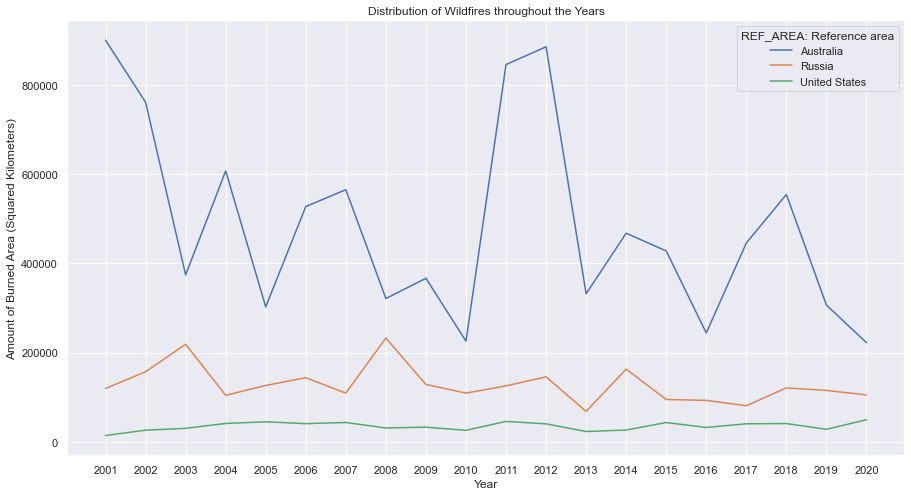

In [31]:
wildfire_countries = ['Australia', 'Russia', 'United States']
plot_hazard(wildfire_countries, 'Wildfires')

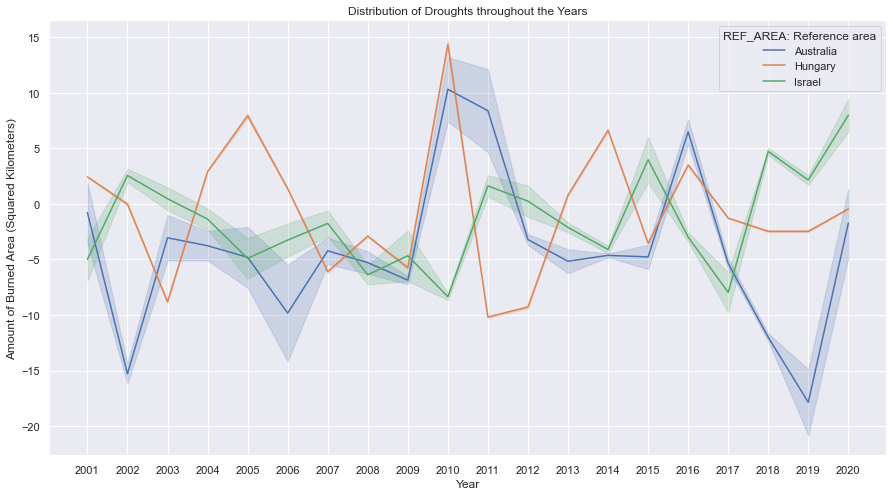

In [32]:
drought_countries = ['Hungary', 'Australia', 'Israel']
plot_hazard(drought_countries, 'Droughts')

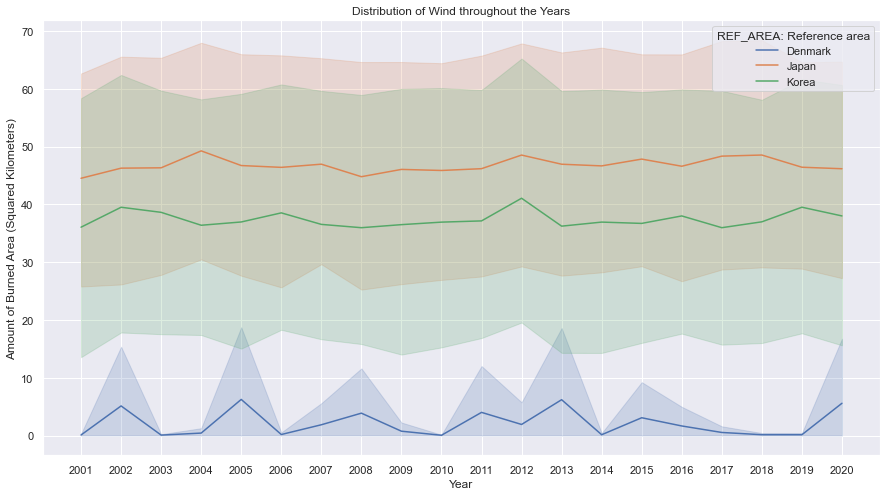

In [33]:
wind_countries = ['Korea', 'Japan', 'Denmark']
plot_hazard(wind_countries, 'Wind')